# Data Cleaning and Preprocessing


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = 'modified_diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Handle missing values
# Fill missing BMI with the mean value
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data = data[(data['bmi'] >= 10) & (data['bmi'] <= 60)]

# Fill missing HbA1c_level with the mean value
data['HbA1c_level'] = data['HbA1c_level'].fillna(data['HbA1c_level'].mean())

# Drop rows with any remaining missing values
data = data.dropna()

# Check and remove duplicate rows
print(f"Duplicate rows before cleaning: {data.duplicated().sum()}")
data = data.drop_duplicates()

# Handle negative ages and missing ages
# Calculate the mean of positive ages
mean_age_positive = data[data['age'] >= 0]['age'].mean()

# Replace negative ages with the mean of positive ages
data['age'] = data['age'].apply(lambda x: mean_age_positive if x < 0 else x)

# Fill missing ages with the mean of positive ages
data['age'] = data['age'].fillna(mean_age_positive)

# Handle outliers in blood_glucose_level
data = data[(data['blood_glucose_level'] <= 300)]

# Handle gender column
# Replace invalid genders with 'unknown'
valid_genders = ['male', 'female']
data['gender'] = data['gender'].apply(lambda x: x if x in valid_genders else 'unknown')

# Handle smoking column
# Replace 'current', 'yes', and 'ever' with 'current'
#data['smoking_history'] = data['smoking_history'].replace(['current', 'yes', 'ever'], 'current')

# Replace 'not current' and 'former' with 'former'
#data['smoking_history'] = data['smoking_history'].replace(['not current', 'former'], 'former')


# Normalize numeric columns
scaler = MinMaxScaler()
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Save the cleaned dataset
cleaned_file_path = 'cleaned_modified_diabetes_prediction_dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Data cleaned and saved to {cleaned_file_path}.")

Missing values before cleaning:
gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64
Duplicate rows before cleaning: 0
Data cleaned and saved to cleaned_modified_diabetes_prediction_dataset.csv.


## Step 2: Classification
### Objectives:
- Implement classification algorithms (Decision Tree and Knn).
- Evaluate models using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the cleaned dataset
cleaned_file_path = 'cleaned_modified_diabetes_prediction_dataset.csv'
data = pd.read_csv(cleaned_file_path)

# Encode categorical columns using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Separate features (X) and target (y)
X = data.drop(columns=['diabetes'])  # 'diabetes' is the target column
y = data['diabetes']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------------------------
# Initialize models
# ----------------------------
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors to 5

# ----------------------------
# Train and test Decision Tree
# ----------------------------
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)

# ----------------------------
# Train and test KNN
# ----------------------------
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# ----------------------------
# Evaluate models
# ----------------------------
metrics = {}

# Decision Tree evaluation
metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, dt_predictions),
    'Precision': precision_score(y_test, dt_predictions),
    'Recall': recall_score(y_test, dt_predictions),
    'F1 Score': f1_score(y_test, dt_predictions),
    'Confusion Matrix': confusion_matrix(y_test, dt_predictions)
}

# KNN evaluation
metrics['KNN'] = {
    'Accuracy': accuracy_score(y_test, knn_predictions),
    'Precision': precision_score(y_test, knn_predictions),
    'Recall': recall_score(y_test, knn_predictions),
    'F1 Score': f1_score(y_test, knn_predictions),
    'Confusion Matrix': confusion_matrix(y_test, knn_predictions)
}

# ----------------------------
# Print evaluation metrics
# ----------------------------
for model_name, model_metrics in metrics.items():
    print(f"\n{model_name} Evaluation Metrics:")
    for metric_name, metric_value in model_metrics.items():
        print(f"{metric_name}: {metric_value}")



Decision Tree Evaluation Metrics:
Accuracy: 0.9520406118495759
Precision: 0.7043576258452291
Recall: 0.7428684627575277
F1 Score: 0.7231006556112611
Confusion Matrix: [[26631   787]
 [  649  1875]]

KNN Evaluation Metrics:
Accuracy: 0.9624273595618196
Precision: 0.8972174900624645
Recall: 0.6259904912836767
F1 Score: 0.7374562427071178
Confusion Matrix: [[27237   181]
 [  944  1580]]


In [8]:
! pip install seaborn

In [11]:
import sys
import seaborn as sns
print("Seaborn is working!")


Seaborn is working!


## Step 3: Clustering
### Objectives:
- Perform clustering using:
  - K-means
  - Hierarchical Clustering
- Analyze and interpret clusters:
  - Cluster characteristics
  - Optimal number of clusters


Determining optimal number of clusters using the Elbow method...


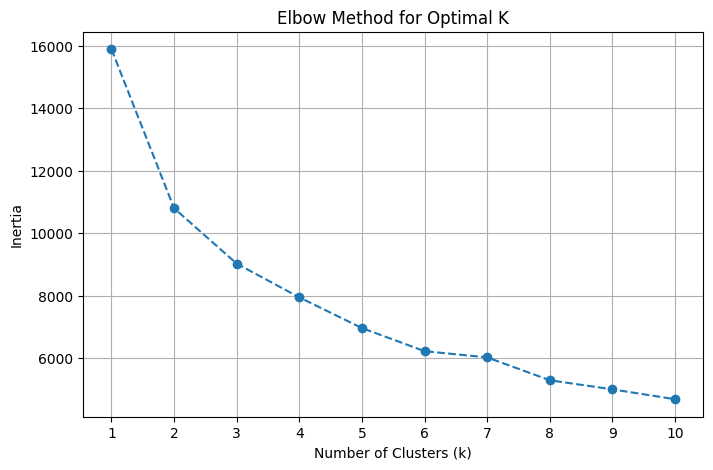

Optimal number of clusters (k) chosen: 3
Performing K-means clustering with optimal k...


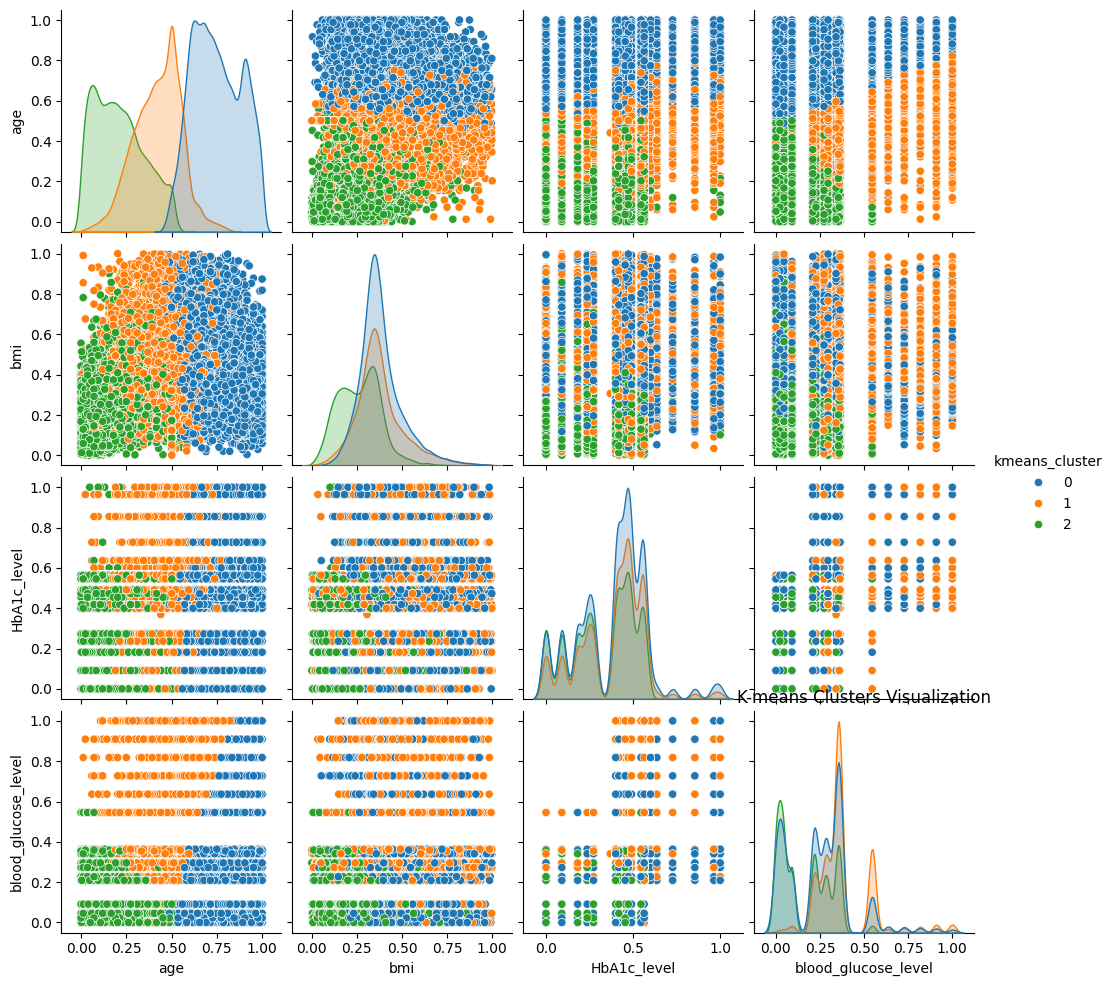

K-means clustering results saved.
Performing Hierarchical clustering on a sample of data...


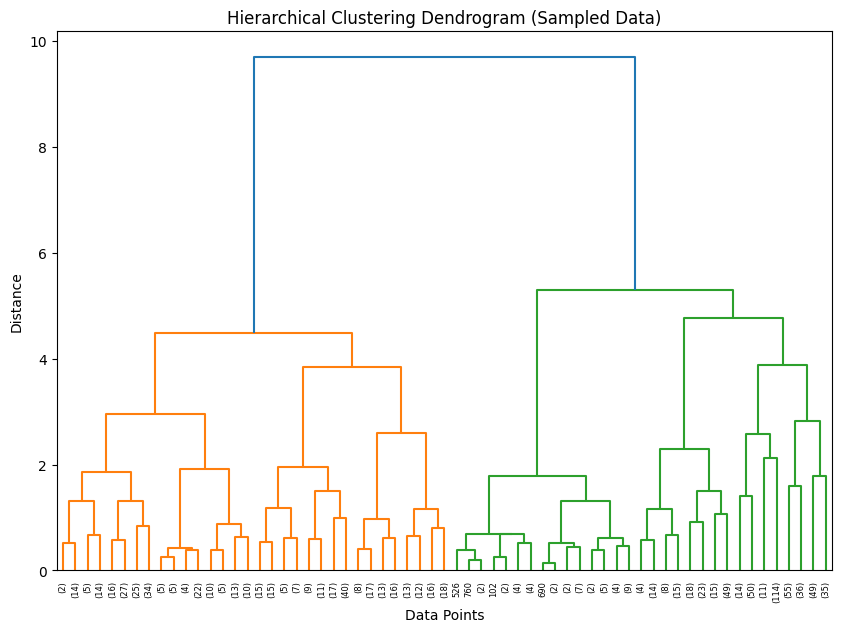

Hierarchical clustering results (sampled) saved.

K-means Cluster Characteristics:
                     age       bmi  HbA1c_level  blood_glucose_level
kmeans_cluster                                                      
0               0.748565  0.380230     0.385146             0.246320
1               0.423555  0.376155     0.387197             0.380731
2               0.211132  0.263157     0.323364             0.163905

Hierarchical Cluster Characteristics (Sampled Data):
                           age       bmi  HbA1c_level  blood_glucose_level
hierarchical_cluster                                                      
1                     0.274723  0.290562     0.344757             0.222686
2                     0.800659  0.387662     0.588395             0.765957
3                     0.680031  0.392723     0.368699             0.252977


In [12]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = 'cleaned_modified_diabetes_prediction_dataset.csv'
data = pd.read_csv(cleaned_file_path)

features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = data[features]

# ---------------------
# 1. Elbow Method for Optimal K
# ---------------------
print("Determining optimal number of clusters using the Elbow method...")
inertia_values = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.savefig('elbow_method_plot.png')
plt.show()

# Based on the Elbow plot
optimal_k = 3
print(f"Optimal number of clusters (k) chosen: {optimal_k}")

# ---------------------
# 2. K-means Clustering
# ---------------------
print("Performing K-means clustering with optimal k...")
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
data['kmeans_cluster'] = kmeans.fit_predict(X)

# Visualize K-means Clusters
sns.pairplot(data, hue='kmeans_cluster', vars=features, palette='tab10')
plt.title("K-means Clusters Visualization")
plt.savefig('optimized_kmeans_clusters.png')
plt.show()

# Save K-means results
data[['kmeans_cluster']].to_csv('kmeans_clusters.csv', index=False)
print("K-means clustering results saved.")

# ---------------------------
# 3. Hierarchical Clustering
# ---------------------------
print("Performing Hierarchical clustering on a sample of data...")

# Random sampling to reduce data size
sampled_data = X.sample(n=1000, random_state=42)

# Perform hierarchical clustering
Z = linkage(sampled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.savefig('optimized_hierarchical_dendrogram.png')
plt.show()

# Assign clusters to sampled data
sampled_data['hierarchical_cluster'] = fcluster(Z, t=3, criterion='maxclust')

# Save Hierarchical Clustering results for the sample
sampled_data['hierarchical_cluster'].to_csv('hierarchical_clusters_sampled.csv', index=False)
print("Hierarchical clustering results (sampled) saved.")

# ---------------------------
# 4. Cluster Analysis
# ---------------------------
# K-means Cluster Analysis
print("\nK-means Cluster Characteristics:")
kmeans_analysis = data.groupby('kmeans_cluster')[features].mean()
print(kmeans_analysis)

# Save K-means cluster characteristics
kmeans_analysis.to_csv('kmeans_cluster_characteristics.csv')

# Hierarchical Clustering Analysis (Sampled Data)
print("\nHierarchical Cluster Characteristics (Sampled Data):")
hierarchical_analysis = sampled_data.groupby('hierarchical_cluster')[features].mean()
print(hierarchical_analysis)

# Save Hierarchical cluster characteristics
hierarchical_analysis.to_csv('hierarchical_cluster_characteristics_sampled.csv')


## Step 4: Result Analysis and Conclusion
### Objectives:
- Compare results of classification and clustering.
- Analyze the strengths and weaknesses of each algorithm.
- Draw final conclusions and provide recommendations.


In [13]:
import sys
import seaborn as sns
print("Seaborn is working!")

Seaborn is working!


<Figure size 1000x600 with 0 Axes>

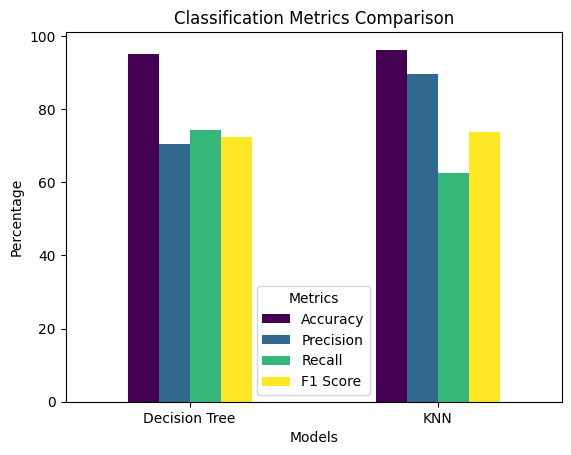


K-means Clustering Analysis (Means):
                     age       bmi  HbA1c_level  blood_glucose_level
kmeans_cluster                                                      
0               0.748565  0.380230     0.385146             0.246320
1               0.423555  0.376155     0.387197             0.380731
2               0.211132  0.263157     0.323364             0.163905


<Figure size 1000x600 with 0 Axes>

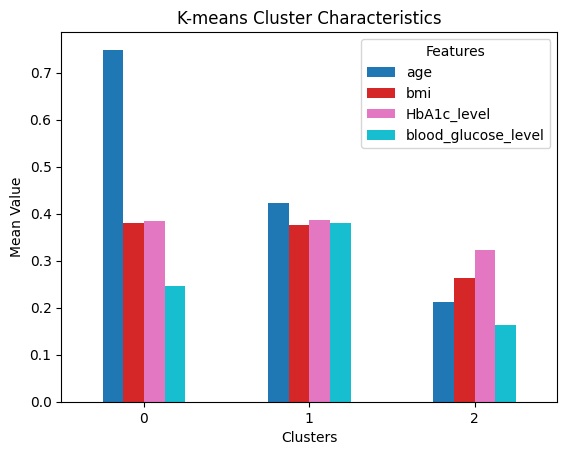


Hierarchical Clustering Analysis (Means):
                           age       bmi  HbA1c_level  blood_glucose_level
hierarchical_cluster                                                      
1.0                   0.497775  0.334397     0.371475             0.263154
2.0                   0.553951  0.357580     0.377950             0.290329
3.0                   0.485079  0.339699     0.374020             0.265980


<Figure size 1000x600 with 0 Axes>

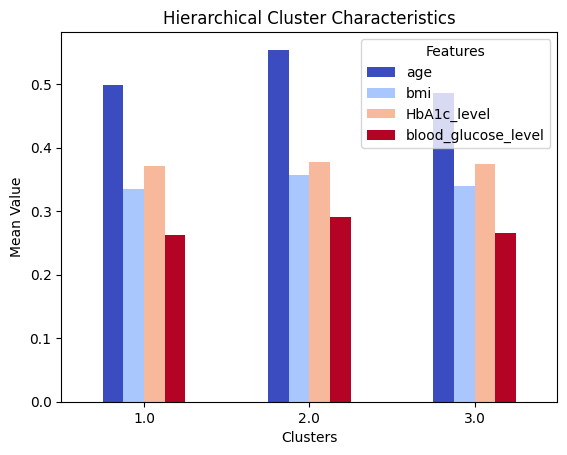

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
cleaned_file_path = 'cleaned_modified_diabetes_prediction_dataset.csv'
data = pd.read_csv(cleaned_file_path)

# Load clustering results
data['kmeans_cluster'] = pd.read_csv('kmeans_clusters.csv')  # Load K-means results
data['hierarchical_cluster'] = pd.read_csv('hierarchical_clusters_sampled.csv')  # Load hierarchical results

# ----------------------------
# 1. Compare Classification Results
# ----------------------------
# Define classification metrics
classification_metrics = {
    'Decision Tree': {'Accuracy': 95.20, 'Precision': 70.43, 'Recall': 74.28, 'F1 Score': 72.31},
    'KNN': {'Accuracy': 96.24, 'Precision': 89.72, 'Recall': 62.59, 'F1 Score': 73.74}  # Updated metrics
}

# Convert to DataFrame for visualization
class_metrics_df = pd.DataFrame(classification_metrics).T

# Plot classification metrics
plt.figure(figsize=(10, 6))
class_metrics_df.plot(kind='bar', colormap='viridis')
plt.title('Classification Metrics Comparison')
plt.ylabel('Percentage')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.savefig('classification_metrics_comparison.png')
plt.show()


# ----------------------------
# 2. Compare Clustering Results (Visualization and Tables)
# ----------------------------
# K-means Cluster Analysis
kmeans_means = data.groupby('kmeans_cluster')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()
print("\nK-means Clustering Analysis (Means):")
print(kmeans_means)

# Visualize K-means Clustering
plt.figure(figsize=(10, 6))
kmeans_means.plot(kind='bar', colormap='tab10')
plt.title('K-means Cluster Characteristics')
plt.ylabel('Mean Value')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.savefig('kmeans_cluster_characteristics.png')
plt.show()

# Hierarchical Clustering Analysis
hierarchical_means = data.groupby('hierarchical_cluster')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()
print("\nHierarchical Clustering Analysis (Means):")
print(hierarchical_means)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
hierarchical_means.plot(kind='bar', colormap='coolwarm')
plt.title('Hierarchical Cluster Characteristics')
plt.ylabel('Mean Value')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.savefig('hierarchical_cluster_characteristics.png')
plt.show()
